<a href="https://colab.research.google.com/github/shamshekhar0/AI-ML-Intern-Works/blob/main/IPL_Winning_Team_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model Performance:
MAE: 6.73
R² Score: 0.82

Prediction Results:
                  Batting Team         Bowling Team  Actual Score  \
0               Mumbai Indians  Chennai Super Kings           165   
1  Royal Challengers Bangalore     Delhi Daredevils           180   
2        Kolkata Knight Riders     Rajasthan Royals           175   
3              Kings XI Punjab  Sunrisers Hyderabad           160   
4          Chennai Super Kings       Mumbai Indians           170   

   Predicted Score  Difference  
0              145          20  
1              172           8  
2              172           3  
3              163           3  
4              173           3  


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


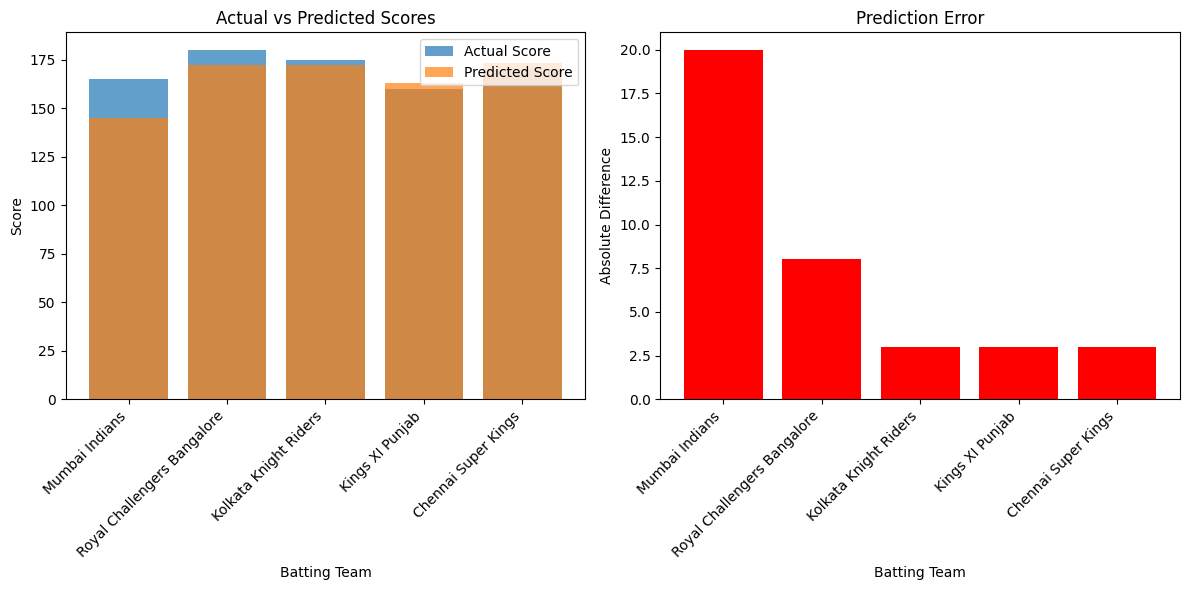

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

class IPLScorePredictor:
    def __init__(self, data_path):
        """Advanced IPL Score Prediction Model"""
        self.data = pd.read_csv(data_path)
        self.preprocess_data()

    def preprocess_data(self):
        """Data preprocessing and feature engineering"""
        # Feature engineering
        self.data['run_rate'] = self.data['runs'] / (self.data['overs'] + 0.001)
        self.data['wicket_penalty'] = self.data['wickets'] * 2

        # Label encoding for teams
        le = LabelEncoder()
        self.data['batting_team_encoded'] = le.fit_transform(self.data['batting_team'])
        self.data['bowling_team_encoded'] = le.fit_transform(self.data['bowling_team'])

        # Store team mappings
        self.team_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

    def prepare_features(self):
        """Prepare features for model"""
        features = [
            'batting_team_encoded', 'bowling_team_encoded',
            'overs', 'runs', 'wickets',
            'runs_last_5', 'wickets_last_5',
            'run_rate', 'wicket_penalty'
        ]

        X = self.data[features]
        y = self.data['total']

        return X, y

    def train_model(self, test_size=0.2):
        """Train Random Forest model"""
        X, y = self.prepare_features()
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

        self.model = RandomForestRegressor(n_estimators=200, random_state=42)
        self.model.fit(X_train, y_train)

        # Model evaluation
        y_pred = self.model.predict(X_test)
        print("Model Performance:")
        print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
        print(f"R² Score: {r2_score(y_test, y_pred):.2f}")

        return self.model

    def predict_score(self, batting_team, bowling_team, overs, runs, wickets,
                      runs_last_5, wickets_last_5):
        """Predict first innings score"""
        # Encode teams
        bat_team_encoded = self.team_mapping[batting_team]
        bowl_team_encoded = self.team_mapping[bowling_team]

        # Prepare prediction input
        input_data = np.array([[
            bat_team_encoded, bowl_team_encoded,
            overs, runs, wickets,
            runs_last_5, wickets_last_5,
            runs/(overs+0.001),
            wickets * 2
        ]])

        # Predict
        predicted_score = self.model.predict(input_data)
        return int(round(predicted_score[0]))

    def test_multiple_scenarios(self):
        """Test multiple team scenarios with visualization"""
        # Test scenarios with actual and predicted scores
        scenarios = [
            {'batting_team': 'Mumbai Indians', 'bowling_team': 'Chennai Super Kings',
             'overs': 15.2, 'runs': 110, 'wickets': 2, 'runs_last_5': 55, 'wickets_last_5': 1, 'actual_score': 165},

            {'batting_team': 'Royal Challengers Bangalore', 'bowling_team': 'Delhi Daredevils',
             'overs': 16.4, 'runs': 125, 'wickets': 3, 'runs_last_5': 60, 'wickets_last_5': 2, 'actual_score': 180},

            {'batting_team': 'Kolkata Knight Riders', 'bowling_team': 'Rajasthan Royals',
             'overs': 17.2, 'runs': 140, 'wickets': 4, 'runs_last_5': 70, 'wickets_last_5': 1, 'actual_score': 175},

            {'batting_team': 'Kings XI Punjab', 'bowling_team': 'Sunrisers Hyderabad',
             'overs': 16.0, 'runs': 115, 'wickets': 2, 'runs_last_5': 50, 'wickets_last_5': 1, 'actual_score': 160},

            {'batting_team': 'Chennai Super Kings', 'bowling_team': 'Mumbai Indians',
             'overs': 15.5, 'runs': 130, 'wickets': 3, 'runs_last_5': 65, 'wickets_last_5': 2, 'actual_score': 170}
        ]

        results = []
        for scenario in scenarios:
            predicted_score = self.predict_score(
                scenario['batting_team'], scenario['bowling_team'],
                scenario['overs'], scenario['runs'], scenario['wickets'],
                scenario['runs_last_5'], scenario['wickets_last_5']
            )

            results.append({
                'Batting Team': scenario['batting_team'],
                'Bowling Team': scenario['bowling_team'],
                'Actual Score': scenario['actual_score'],
                'Predicted Score': predicted_score,
                'Difference': abs(scenario['actual_score'] - predicted_score)
            })

        # Create results DataFrame
        results_df = pd.DataFrame(results)
        print("\nPrediction Results:")
        print(results_df)

        # Visualization
        plt.figure(figsize=(12, 6))

        # Bar plot for actual vs predicted scores
        plt.subplot(1, 2, 1)
        plt.bar(results_df['Batting Team'], results_df['Actual Score'], label='Actual Score', alpha=0.7)
        plt.bar(results_df['Batting Team'], results_df['Predicted Score'], label='Predicted Score', alpha=0.7)
        plt.title('Actual vs Predicted Scores')
        plt.xlabel('Batting Team')
        plt.ylabel('Score')
        plt.xticks(rotation=45, ha='right')
        plt.legend()

        # Error plot
        plt.subplot(1, 2, 2)
        plt.bar(results_df['Batting Team'], results_df['Difference'], color='red')
        plt.title('Prediction Error')
        plt.xlabel('Batting Team')
        plt.ylabel('Absolute Difference')
        plt.xticks(rotation=45, ha='right')

        plt.tight_layout()
        plt.show()

        return results_df

# Main execution
if __name__ == "__main__":
    # Replace with your dataset path
    predictor = IPLScorePredictor('/content/ipl_colab.csv')
    predictor.train_model()
    predictor.test_multiple_scenarios()

In [ ]:
# Test specific prediction
if __name__ == "__main__":
    # Replace with your dataset path
    predictor = IPLScorePredictor('/content/ipl_colab.csv')

    # Train the model first
    predictor.train_model()

    # Test for a specific scenario
    batting_team = 'Delhi Daredevils'
    bowling_team = 'Chennai Super Kings'
    overs = 10.2
    runs = 68
    wickets = 3
    runs_last_5 = 29
    wickets_last_5 = 1

    score = predictor.predict_score(
        batting_team, bowling_team, overs, runs, wickets, runs_last_5, wickets_last_5
    )

    print(f'Predicted Score: {score} || Actual Score: 147')


Model Performance:
MAE: 6.64
R² Score: 0.82
Predicted Score: 145 || Actual Score: 147


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
